True Mean: -0.8087402952789973
True Variance: 4.203338545400464

Estimated Mean: -0.808740295278995
Estimated Variance: 4.2033385454000225


/tmp/ipykernel_12573/4120843250.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, label="Data")


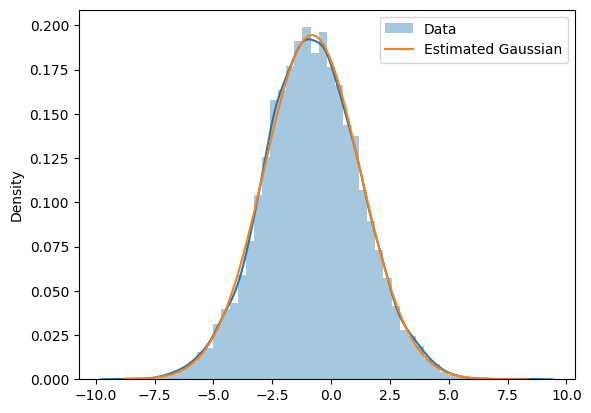

In [1]:
import numpy as np

# Function to generate Gaussian distributed data with random mean and variance
def generate_data(size):
    mean = np.random.uniform(-10, 10)
    variance = np.random.uniform(1, 5)
    data = np.random.normal(mean, np.sqrt(variance), size)
    return data

# Function to calculate the log likelihood for Gaussian distribution
def negative_log_likelihood(data, mean, variance):
    return 0.5* np.sum(np.log(variance) + 0.5* ((data - mean) ** 2) / variance)

# Gradient descent to estimate mean and variance using maximum log likelihood
def gradient_descent(data, learning_rate=0.00001, epochs=10000):
    mean_estimate = np.random.randn()
    variance_estimate = np.random.randn()

    for epoch in range(epochs):
        error = data - mean_estimate
        gradient_mean = - np.sum(error) / variance_estimate #derviative of the negative log likelihood with respect to mean
        gradient_variance = -0.5 * (np.sum((error ** 2) / (variance_estimate ** 2)) - len(data) / variance_estimate) #derviative of the negative log likelihood with respect to variance
        
        mean_estimate -= learning_rate * gradient_mean # step in the negative direction of the gradient
        variance_estimate -= learning_rate * gradient_variance # step in the negative direction of the gradient 

    return mean_estimate, abs(variance_estimate)

# Generate Gaussian distributed data
data = generate_data(10000)

# Estimate mean and variance using gradient descent
estimated_mean, estimated_variance = gradient_descent(data)

print("True Mean:", np.mean(data))
print("True Variance:", np.var(data))
print("\nEstimated Mean:", estimated_mean)
print("Estimated Variance:", estimated_variance)

# visualize the data and the estimated gaussian 
import matplotlib.pyplot as plt
import seaborn as sns

# equation of a gaussian 
def gaussian(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-0.5 * ((x - mean) ** 2) / variance)
sns.distplot(data, hist=True, label="Data")
# Plot only the guassian curve with the estimated paramters without histograms
plt.plot(np.linspace(np.min(data), np.max(data), 100), gaussian(np.linspace(np.min(data), np.max(data), 100), estimated_mean, estimated_variance), label="Estimated Gaussian")
plt.legend()
plt.show()
